<a href="https://colab.research.google.com/github/riddhipatel09/AI/blob/main/Linear-regression(diabetes-prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Step 1: Load Medical Dataset (Diabetes)
# ------------------------------
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]   # use only one feature (e.g., BMI)
y = diabetes.target                  # disease progression measure

In [ ]:
# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

n = len(X)

Epoch: 100 Cost= 2181531.5 W= 29.397816 b= 96.66217
Epoch: 200 Cost= 1744916.0 W= 39.362286 b= 131.73071
Epoch: 300 Cost= 1732101.4 W= 43.027927 b= 144.63179
Epoch: 400 Cost= 1747394.6 W= 44.37658 b= 149.37706
Epoch: 500 Cost= 1755727.2 W= 44.87273 b= 151.1235
Epoch: 600 Cost= 1759172.1 W= 45.055885 b= 151.76353
Epoch: 700 Cost= 1760483.4 W= 45.123005 b= 152.00305
Epoch: 800 Cost= 1760944.8 W= 45.146305 b= 152.09587
Epoch: 900 Cost= 1761148.0 W= 45.156506 b= 152.12553
Epoch: 1000 Cost= 1761223.6 W= 45.160297 b= 152.13528

Training cost= 1761223.6 Weight= 45.160297 Bias= 152.13528


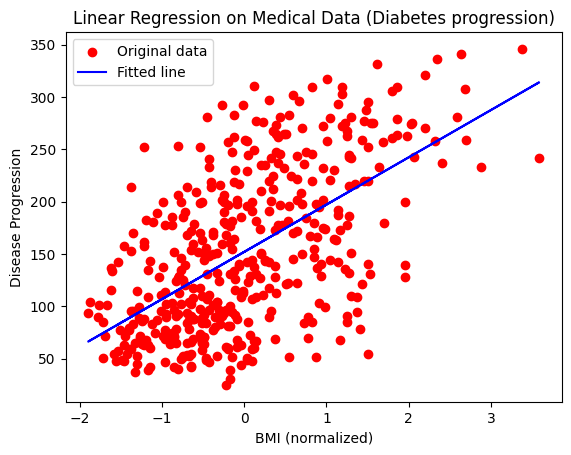

In [ ]:
# Step 2: Define Placeholders
# ------------------------------
X_tf = tf.placeholder("float")
Y_tf = tf.placeholder("float")

# ------------------------------
# Step 3: Model Parameters
# ------------------------------
W = tf.Variable(np.random.randn(), name="weight", dtype=tf.float32)
b = tf.Variable(np.random.randn(), name="bias", dtype=tf.float32)

# ------------------------------
# Step 4: Hypothesis (Linear Model)
# ------------------------------
y_pred = tf.add(tf.multiply(X_tf, W), b)

# ------------------------------
# Step 5: Cost Function (MSE)
# ------------------------------
cost = tf.reduce_sum(tf.pow(y_pred - Y_tf, 2)) / (2 * n)

# ------------------------------
# Step 6: Optimizer
# ------------------------------
learning_rate = 0.01
training_epochs = 1000
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# ------------------------------
# Step 7: Training
# ------------------------------
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Train model
    for epoch in range(training_epochs):
        for (_x, _y) in zip(X, y):
            sess.run(optimizer, feed_dict={X_tf: _x, Y_tf: _y})

        if (epoch+1) % 100 == 0:
            c = sess.run(cost, feed_dict={X_tf: X, Y_tf: y})
            print("Epoch:", (epoch+1), "Cost=", c, "W=", sess.run(W), "b=", sess.run(b))

    # Final parameters
    weight = sess.run(W)
    bias = sess.run(b)
    training_cost = sess.run(cost, feed_dict={X_tf: X, Y_tf: y})

    print("\nTraining cost=", training_cost, "Weight=", weight, "Bias=", bias)

    # ------------------------------
    # Step 8: Predictions
    # ------------------------------
    predictions = weight * X + bias

# ------------------------------
# Step 9: Plot Results
# ------------------------------
plt.scatter(X, y, color='red', label='Original data')
plt.plot(X, predictions, color='blue', label='Fitted line')
plt.title("Linear Regression on Medical Data (Diabetes progression)")
plt.xlabel("BMI (normalized)")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()